# Telecom Network Quality Diagnostics 


## 📡 Problem Statement 

A telecom company is experiencing **uneven network quality** across its towers, network types (4G and 5G), and locations (urban, suburban, rural). While some users enjoy fast and reliable connections, others face **high latency and poor performance**.

The goal of this project is to use **Exploratory Data Analysis (EDA)** to:
- Identify factors associated with **poor network quality**  
- Highlight **high-impact towers**  
- Compare performance across **network types** and **area types**

**Goal:** Use Exploratory Data Analysis (EDA) and data validation to understand what drives network quality issues across towers, network types (4G/5G), and area types (Urban/Suburban/Rural).


These insights will guide decisions on where to **investigate, monitor, and optimize** the network next.









**Visuals we will be creating include:**
1. Scatter plot: Quality vs Latency  
2. Bar chart: Tower coverage (which towers have the most records)  
3. Scatter (split): Quality vs Signal Strength by Network Type  
4. Correlation heatmap  
5. Interactive scatter (Plotly): Elevation vs Quality with Network Type selector  
6. KDE (split): Latency distribution by Area Type  
7. KDE: Interference distribution

**Dataset:** `telecom_network_quality_data.csv`.

### Questions to keep in mind

As you code, keep coming back to these questions:
- Where do we see poor quality scores, and how common are they?
- Which variables move together with quality (strong relationships)?
- Do patterns look different for 4G vs 5G?
- Do Urban/Suburban/Rural behave differently?
- Which towers should a telecom team investigate first?

**Important:**  This is diagnostic analysis to produce actionable insights.

### 📊 Dataset Columns & Descriptions

| **Column Name** | **Description** |
|------------------|------------------|
| **Tower_id** | Unique identifier for each telecom tower. Used to group and compare network performance across infrastructure locations. |
| **Network_type** | The network generation serving the connection (e.g., 4G or 5G). Used to compare performance patterns between technologies. |
| **Area_type** | Type of location where the tower operates: Urban, Suburban, or Rural. Helps assess geographic performance differences. |
| **Elevation_m** | Elevation of the area around the tower (in meters). Used as a proxy for terrain effects on signal propagation. |
| **Interference_index** | A composite score representing environmental or signal interference. Higher values indicate more interference. |
| **Signal_strength_dbm** | Measured signal strength in decibel-milliwatts (dBm). Values closer to zero (less negative) indicate stronger signal. |
| **Packet_loss_pct** | Percentage of data packets lost during transmission. Higher values indicate poorer network reliability. |
| **Latency_ms** | Time delay (in milliseconds) between sending and receiving data. Higher latency generally means worse user experience. |
| **Throughput_mbps** | Data transfer speed in megabits per second (Mbps). Higher values indicate faster connections. |
| **Standard_quality_score** | Overall normalized network quality score (0–100), combining multiple performance indicators. Higher scores indicate better quality. |


## 0. Setup

In [37]:
# Import libriaries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: interactive widgets in Jupyter
from ipywidgets import interact

# Optional: Plotly for interactive charts
import plotly.express as px

plt.rcParams["figure.figsize"] = (9, 5)

In [38]:
# Load data
df = pd.read_csv("telecom_network_quality_data.csv")
df.head()

,Tower_id,Network_type,Area_type,Elevation_m,Interference_index,Signal_strength_dbm,Packet_loss_pct,Latency_ms,Throughput_mbps,Standard_quality_score
0,TWR_088,5G,Urban,61.1,74.0,-90.7,2.36,75.0,79.2,64.3
1,TWR_105,4G,Urban,158.6,100.0,-89.1,3.14,67.8,1.0,58.0
2,TWR_018,5G,Suburban,181.0,51.9,-93.0,NaN,79.6,50.3,61.5
3,TWR_030,5G,Urban,28.2,87.1,-91.7,2.95,79.5,9.5,64.0
4,TWR_005,4G,Urban,147.8,85.9,-85.5,2.34,61.2,32.4,79.0


### Quick validation checks

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tower_id                4500 non-null   object 
 1   Network_type            4500 non-null   object 
 2   Area_type               4500 non-null   object 
 3   Elevation_m             4500 non-null   float64
 4   Interference_index      4500 non-null   float64
 5   Signal_strength_dbm     4428 non-null   float64
 6   Packet_loss_pct         4448 non-null   float64
 7   Latency_ms              4443 non-null   float64
 8   Throughput_mbps         4458 non-null   float64
 9   Standard_quality_score  4500 non-null   float64
dtypes: float64(7), object(3)
memory usage: 351.7+ KB


In [40]:
# Missing values snapshot
df.isna().mean().sort_values(ascending=False)

Signal_strength_dbm       0.016000
Latency_ms                0.012667
Packet_loss_pct           0.011556
Throughput_mbps           0.009333
Tower_id                  0.000000
Network_type              0.000000
Area_type                 0.000000
Elevation_m               0.000000
Interference_index        0.000000
Standard_quality_score    0.000000
dtype: float64

In [41]:
df.isnull().sum()

Tower_id                   0
Network_type               0
Area_type                  0
Elevation_m                0
Interference_index         0
Signal_strength_dbm       72
Packet_loss_pct           52
Latency_ms                57
Throughput_mbps           42
Standard_quality_score     0
dtype: int64

In [42]:
# Basic summary
# df.describe(include="all").T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation_m,4500.0,212.014467,157.516399,0.0,103.975,166.70,281.425,954.40
Interference_index,4500.0,60.805622,19.895577,0.0,47.100,61.45,74.800,100.00
Signal_strength_dbm,4428.0,-89.303659,10.036027,-120.0,-95.900,-88.90,-82.500,-56.50
Packet_loss_pct,4448.0,1.947068,0.671675,0.0,1.470,1.93,2.390,4.29
Latency_ms,4443.0,59.960185,18.392449,5.0,47.600,59.30,71.900,134.80
Throughput_mbps,4458.0,42.671781,31.409793,1.0,18.500,35.70,62.700,204.70
Standard_quality_score,4500.0,71.253400,12.394268,30.5,62.800,71.70,80.000,100.00


## 1) Scatter plot — Standard_quality_score vs Latency_ms

**What to look for**
- Does quality decrease as latency increases?
- Is the pattern roughly linear or more scattered?
- Are there visible clusters (e.g., multiple groups)?

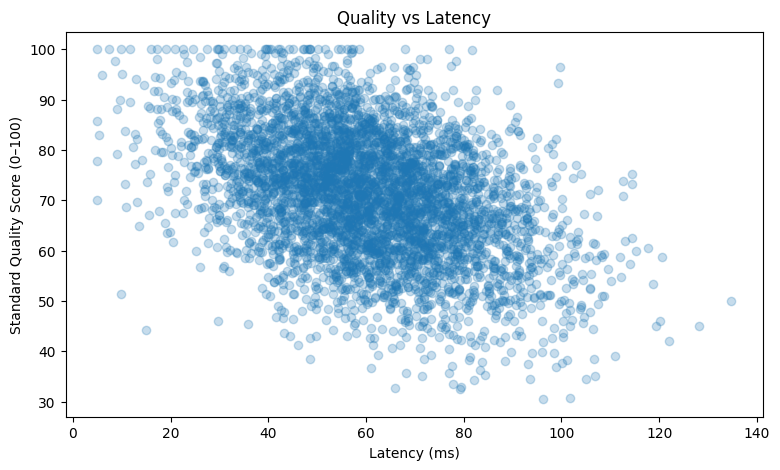

In [43]:
# Basic scatter plot
clean = df.dropna(subset=["Standard_quality_score", "Latency_ms"])

plt.figure()
plt.scatter(clean["Latency_ms"], clean["Standard_quality_score"], alpha=0.25)
plt.xlabel("Latency (ms)")
plt.ylabel("Standard Quality Score (0–100)")
plt.title("Quality vs Latency")
plt.show()

### 📉 Interpretation

- There is a clear **negative relationship** between **latency** and **network quality**: higher latency is generally associated with lower quality scores.  
- The pattern is **not perfectly linear**; points are widely scattered across the plot.  
- This spread shows that **latency is not the only factor** affecting network quality.  
- At similar latency levels, quality scores can vary significantly, indicating the influence of other variables such as **signal strength**, **packet loss**, and **interference**.  
- Overall, latency is an **important contributor** to network quality, but it should be evaluated **alongside other performance metrics** rather than in isolation.


## 2) Bar chart — Which towers are linked to the most records?

**What to look for**
- Which towers appear most often (higher operational impact)?
- Does the distribution look skewed (a few towers dominate)?

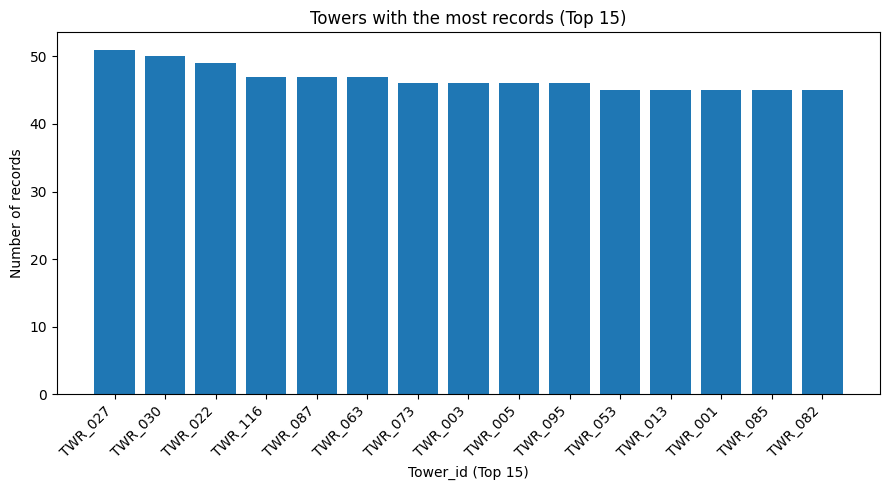

In [44]:
tower_counts = df["Tower_id"].value_counts().head(15)

plt.figure()
plt.bar(tower_counts.index, tower_counts.values)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Tower_id (Top 15)")
plt.ylabel("Number of records")
plt.title("Towers with the most records (Top 15)")
plt.tight_layout()
plt.show()



In [45]:
tower_counts.head(10)

Tower_id
TWR_027    51
TWR_030    50
TWR_022    49
TWR_116    47
TWR_087    47
TWR_063    47
TWR_073    46
TWR_003    46
TWR_005    46
TWR_095    46
Name: count, dtype: int64

### 📊 Interpretation

- The bar chart shows the **top 15 towers** with the highest number of recorded network observations.  
- A small group of towers appears **more frequently** in the data, indicating higher operational load or broader coverage.  
- The distribution is **slightly skewed**, suggesting that a few towers contribute a **disproportionate share** of overall network activity.  
- These high-volume towers are **high-impact infrastructure points** — performance issues here could affect a large number of users.  
- This chart helps identify which towers should be **prioritized for deeper performance analysis and continuous monitoring**.


## 3) Scatter plot (split) — Quality vs Signal Strength by Network Type

**What to look for**
- Does stronger signal (less negative dBm) align with higher quality?
- Do 4G and 5G show different spreads or slopes?

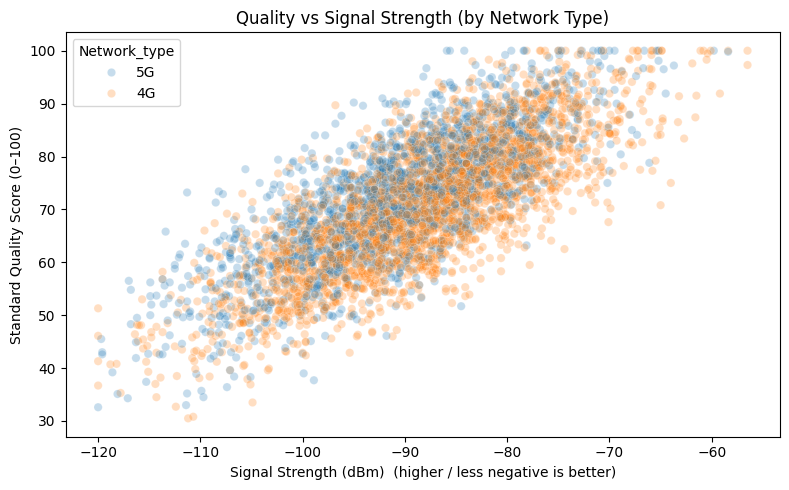

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

clean = df.dropna(
    subset=["Standard_quality_score", "Signal_strength_dbm", "Network_type"]
)

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=clean,
    x="Signal_strength_dbm",
    y="Standard_quality_score",
    hue="Network_type",
    alpha=0.25
)

plt.xlabel("Signal Strength (dBm)  (higher / less negative is better)")
plt.ylabel("Standard Quality Score (0–100)")
plt.title("Quality vs Signal Strength (by Network Type)")
plt.tight_layout()
plt.show()


### 📡 Interpretation

- There is a **strong positive relationship** between **signal strength** and **network quality**: as signal strength improves (values become less negative), the **standard quality score increases**.  
- This relationship is **consistent across both 4G and 5G**, indicating that signal strength is a key driver of quality regardless of network type.  
- **5G data points** show a **slightly wider spread**, especially at moderate signal levels, suggesting greater variability in quality under similar signal conditions.  
- At **higher signal strengths**, both 4G and 5G tend to achieve **higher quality scores**, reinforcing that strong signal is a necessary condition for good performance.  
- The overlap between 4G and 5G indicates that **signal strength alone does not fully differentiate network performance** — other factors such as **latency, interference, and packet loss** also influence overall quality.


> “**Strong signal** is foundational for good network quality, but having strong signal alone doesn’t guarantee consistent performance—especially for 5G.”

## 4) Correlation heatmap — Numeric drivers vs quality

**How to use**
- Look at absolute correlations (strength) and sign (direction).
- Use this to decide what to investigate next, not to claim causation.

In [47]:
# Get only the numeric columns in the dataframe
list(df.select_dtypes(include='number').columns)

['Elevation_m',
 'Interference_index',
 'Signal_strength_dbm',
 'Packet_loss_pct',
 'Latency_ms',
 'Throughput_mbps',
 'Standard_quality_score']

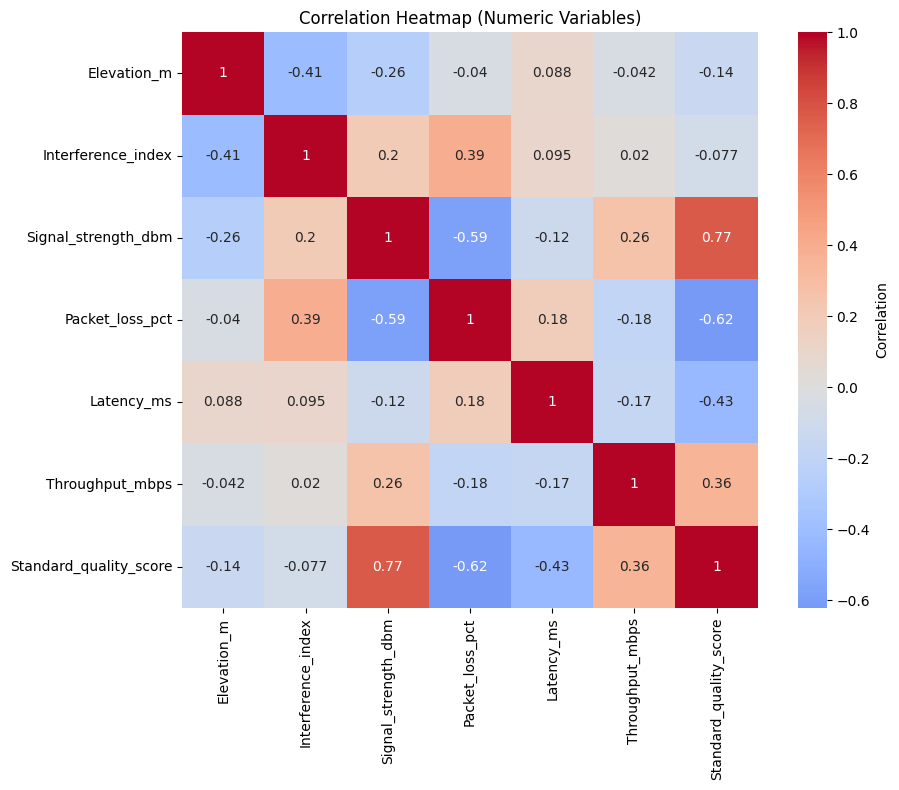

In [28]:
num_cols = df.select_dtypes(include="number").columns
corr = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,        # set to True if you want numbers on the cells
    cmap="coolwarm",
    center=0,
    square=True,
    cbar_kws={"label": "Correlation"}
)

plt.title("Correlation Heatmap (Numeric Variables)")
plt.tight_layout()
plt.show()


In [24]:
 corr["Standard_quality_score"].sort_values()

Packet_loss_pct          -0.621239
Latency_ms               -0.429884
Elevation_m              -0.140353
Interference_index       -0.077495
Throughput_mbps           0.359977
Signal_strength_dbm       0.767275
Standard_quality_score    1.000000
Name: Standard_quality_score, dtype: float64

### 🔍 Interpretation

- **Signal strength** shows the **strongest positive correlation** with network quality, indicating that stronger signals are closely associated with higher quality scores.  
- **Packet loss** has a **strong negative correlation** with quality, meaning higher packet loss is tightly linked to poorer network performance.  
- **Latency** also shows a **moderate negative correlation**, reinforcing that increased delay degrades user experience.  
- **Throughput** has a **moderate positive correlation** with quality, suggesting that faster data speeds contribute to better perceived performance.  
- **Elevation** and **interference index** show **weak correlations** with quality, implying they may affect performance indirectly or only in specific contexts rather than being primary drivers.  

Overall, the heatmap highlights **signal strength**, **packet loss**, and **latency** as the **most important variables** to prioritize for deeper investigation.


>Correlation shows association, **not causation**.

>This heatmap is used to rank and prioritize variables, not to make final causal claims.

### 🔗 Correlation vs Causation: Key Differences

| **Aspect** | **Correlation** | **Causation** |
|------------|------------------|---------------|
| **What it shows** | Variables change together | One variable directly causes a change in another |
| **Direction** | Can be positive or negative | Has a clear **cause → effect** relationship |
| **What the heatmap provides** | Strength and direction of association | Not provided by correlation |
| **Use in this analysis** | Rank and prioritize variables for investigation | Requires further analysis or experiments |
| **Example in this project** | Packet loss is strongly associated with lower quality | Cannot say packet loss alone causes poor quality |


> Correlation helps us decide where to look, not what causes what.

## 5) Interactive scatter (Plotly) — Elevation vs Quality (filter by Network Type)

**Why this matters**
- Terrain can affect signal propagation and coverage.
- Interactivity helps you explore quickly without rewriting code.

In [30]:
def plot_elevation_by_network(selected_network):
    sub = df[df["Network_type"] == selected_network].dropna(subset=["Elevation_m", "Standard_quality_score"])
    fig = px.scatter(
        sub,
        x="Elevation_m",
        y="Standard_quality_score",
        color="Area_type",
        title=f"Elevation vs Quality — {selected_network} (colored by Area Type)",
        opacity=0.35
    )
    fig.show()

interact(plot_elevation_by_network, selected_network=sorted(df["Network_type"].unique()))

interactive(children=(Dropdown(description='selected_network', options=('4G', '5G'), value='4G'), Output()), _…

<function __main__.plot_elevation_by_network(selected_network)>

### 🗺️ Interpretation

- There is **no strong linear relationship** between **elevation** and **network quality** for either **4G or 5G**.  
- Quality scores are **widely spread across all elevation levels**, indicating that elevation alone does not determine performance.  
- **Urban areas** are mostly concentrated at **lower elevations** and show relatively **consistent quality levels**.  
- **Rural areas** span a much **wider elevation range**, yet their quality scores **overlap significantly** with urban and suburban areas.  
- This suggests that **terrain (elevation) influences network quality indirectly**, likely through interactions with **signal strength, interference, and infrastructure placement**.  
- The similar patterns observed for **4G and 5G** indicate that elevation affects both technologies in **comparable ways**, rather than uniquely impacting one network type.

---

### 🎤 Summary
> “Elevation by itself isn’t a strong driver of quality, but it helps explain where other problems might arise — especially when combined with area type and infrastructure constraints.”


## 6) KDE plot (split) — Latency distribution by Area Type

**What to infer**
- Do Urban/Suburban/Rural have different latency distributions?
- Look at peaks, spread, and overlap (not exact values).

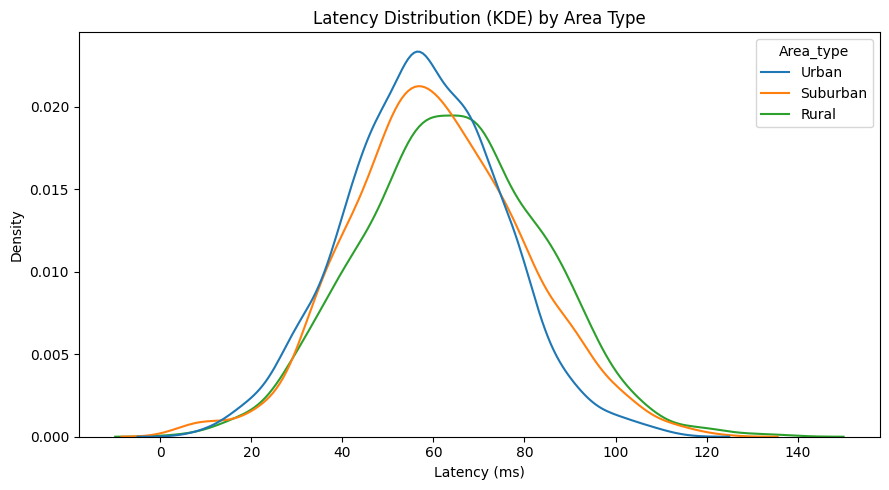

In [32]:
clean = df.dropna(subset=["Latency_ms", "Area_type"])

sns.kdeplot(
    data=clean,
    x="Latency_ms",
    hue="Area_type",
    common_norm=False,
    fill=False
)

plt.xlabel("Latency (ms)")
plt.title("Latency Distribution (KDE) by Area Type")
plt.tight_layout()
plt.show()

### 📡 Interpretation

- Latency distributions differ across **Urban**, **Suburban**, and **Rural** areas.  
- **Urban areas** show a **tighter distribution** with lower spread, indicating more **consistent latency performance**.  
- **Suburban areas** fall between urban and rural, with **moderate spread** and slightly higher latency values.  
- **Rural areas** have the **widest distribution** and a **longer right tail**, indicating higher variability and more frequent high-latency events.  
- Although the distributions overlap, the shift toward **higher latency in rural areas** suggests **less consistent network performance** compared to urban areas.  
- This pattern highlights **location-based performance differences**, likely driven by **infrastructure density** and **network coverage constraints**.

---

### 🎤 summary
> “The issue isn’t just higher average latency in rural areas — it’s the lack of consistency, which users feel as unstable performance.”


## 7) KDE plot — Interference distribution

**What to infer**
- Is interference mostly moderate, or are there many high-interference events?
- A long right tail suggests occasional severe interference conditions.

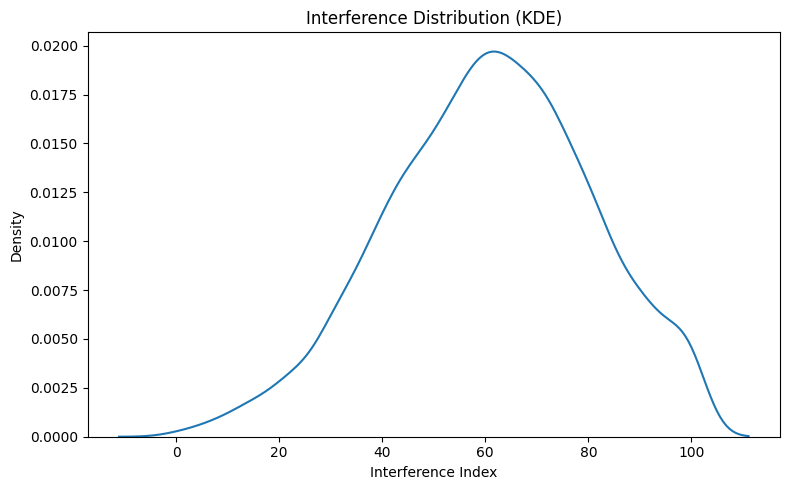

In [35]:
clean = df.dropna(subset=["Interference_index"])

plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=clean,
    x="Interference_index"
)

plt.xlabel("Interference Index")
plt.title("Interference Distribution (KDE)")
plt.tight_layout()
plt.show()


### 📶 Interpretation

- The interference distribution is centered around **moderate values**, indicating that most network observations experience manageable interference levels.  
- The distribution shows a sligh **left-skewed tail**, meaning there are **occasional high-interference events**.  
- These high-interference cases are **less frequent but high impact**, as they can significantly degrade network performance when they occur.  
- The long right tail suggests that interference issues are **situational rather than constant**, likely driven by factors such as **congestion**, **environmental conditions**, or **localized signal overlap**.  
- Overall, interference appears to be a **risk factor that spikes under certain conditions**, rather than a consistently dominant issue across the network.

---

### 🎤 Summary
> “Most of the time interference is manageable, but when it spikes, it can seriously affect quality — which makes it important to monitor, not just average.”


## Wrap-up: turn visuals into actions (no modeling)

Use your results to answer:
- Which 2–3 variables seem most tied to quality drops?
- Which areas (Urban/Suburban/Rural) show worse latency distribution?
- Which towers should be inspected first (high volume + poor quality)?
- Do 4G and 5G show different behavior that suggests different interventions?

## Wrap-up: Turn visuals into actions

<details>
  <summary><b>1) Which 2–3 variables seem most tied to quality drops?</b></summary>

  <br>

  The analysis suggests that the following variables are most associated with decreases in network quality:

  - **Signal strength** — the strongest positive relationship with quality; weaker signal consistently aligns with lower quality scores.  
  - **Packet loss** — strongly negatively associated with quality; higher packet loss corresponds to sharp drops in performance.  
  - **Latency** — moderately negatively associated with quality; higher latency contributes to poorer user experience, though not in isolation.

  These variables should be the primary focus for diagnostics and optimization.
</details>

<details>
  <summary><b>2) Which areas (Urban/Suburban/Rural) show worse latency distribution?</b></summary>

  <br>

  - **Rural areas** show the widest latency distribution and more frequent high-latency events, indicating less consistent performance.  
  - **Suburban areas** fall between urban and rural in both spread and typical latency values.  
  - **Urban areas** exhibit the most stable latency, with tighter distributions and fewer extreme values.

  This suggests that location-based infrastructure differences play a significant role in latency variability.
</details>

<details>
  <summary><b>3) Which towers should be inspected first (high volume + poor quality)?</b></summary>

  <br>

  - Towers with the **highest number of records** should be prioritized first, as they represent **high-impact infrastructure points**.  
  - These towers affect a larger share of users, so any performance degradation there will have outsized customer impact.  
  - Next, combine **tower volume** with **average quality** or **latency** to identify critical hotspots.

</details>

<details>
  <summary><b>4) Do 4G and 5G show different behavior that suggests different interventions?</b></summary>

  <br>

  - Both 4G and 5G follow similar overall patterns with respect to signal strength, latency, and quality.  
  - **5G shows greater variability** in quality at comparable signal levels, suggesting higher sensitivity to environmental or network conditions.  
  - This implies **4G interventions** may focus on coverage and stability, while **5G interventions** may require tighter interference management and configuration tuning.

</details>

<details>
  <summary><b>Overall takeaway</b></summary>

  <br>

  Network quality issues are driven primarily by **signal strength**, **packet loss**, and **latency**, with **rural areas** and **high-volume towers** presenting the greatest operational risk.  
  While 4G and 5G behave similarly at a high level, **5G requires more precise optimization** due to higher variability.
</details>
